In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [231]:
def get_event_times(row):
    start_queue1 = row["tm_arrival_queue1"]
    tm_queue1 = row["tm_start_service1"] - start_queue1
    
    start_service1 = row["tm_start_service1"]
    tm_service1 = row["tm_end_service1"] - start_service1
    
    start_queue2 = row["tm_arrival_queue2"]
    tm_queue2 = row["tm_start_service2"] - start_queue2
    
    start_service2 = row["tm_start_service2"]
    tm_service2 = row["tm_end_service2"] - start_service2
    
    sequencia = [
        (start_queue1, tm_queue1), 
        (start_service1, tm_service1), 
        (start_queue2, tm_queue2),
        (start_service2, tm_service2)
    ]
    cores = ('tab:orange', 'tab:green', 'tab:red', 'tab:blue')
    
    return sequencia, cores

In [423]:
def resumo(arquivo, return_table=False, save_name=None):
    events = pd.read_csv(arquivo, index_col=0)
    
    # Horizontal bar plot with gaps
    fig, ax = plt.subplots(figsize=(15, 4))

    for i, idx in enumerate(events.index):
        seq, cores = get_event_times(events.loc[idx])    
        ax.broken_barh(seq, (i+0.75, 0.5), facecolors=cores)

    # ax.set_ylim(5, 35)
    # ax.set_xlim(0, 200)
    ax.set_xlabel('seconds since start')
    # ax.set_yticks([15, 25], labels=['Bill', 'Jim'])     # Modify y-axis tick labels
    ax.grid(True)                                         # Make grid lines visible


    legend = ('queue1', 'service1', 'queue2', 'service2')

    leg1 = mlines.Line2D([], [], color=cores[0], marker='s', ls='', label=legend[0])
    leg2 = mlines.Line2D([], [], color=cores[1], marker='s', ls='', label=legend[1])
    leg3 = mlines.Line2D([], [], color=cores[2], marker='s', ls='', label=legend[2])
    leg4 = mlines.Line2D([], [], color=cores[3], marker='s', ls='', label=legend[3])

    plt.legend(handles=[leg1, leg2, leg3, leg4], loc="upper left")

    if save_name is not None: 
        plt.savefig(f"Figuras/{save_name}.png")
    
    plt.show()
    
    if return_table:  return events

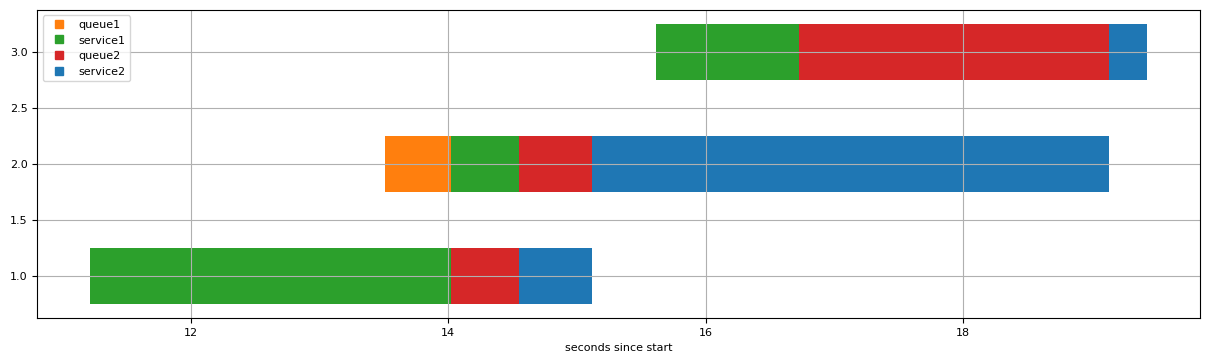

In [270]:
resumo("teste_retry.csv")

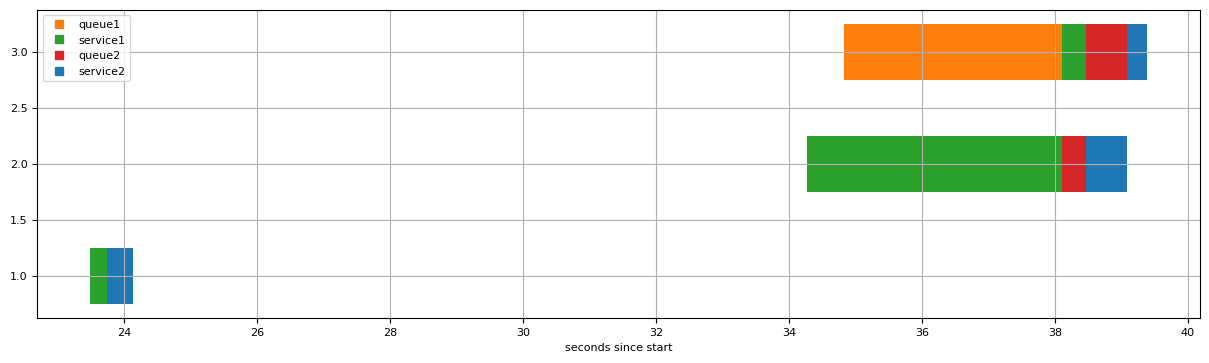

In [273]:
resumo("teste_prioridade.csv")

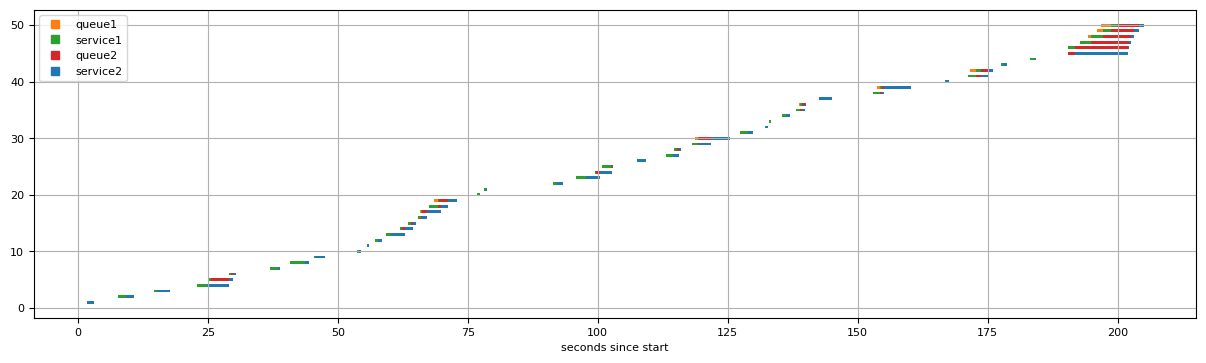

In [281]:
resumo("debug_aleatorio.csv")

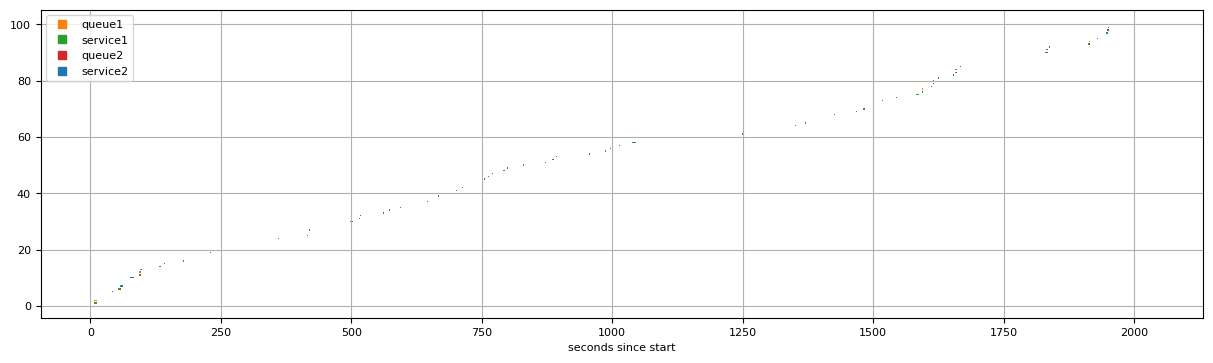

In [277]:
resumo("debug_aleatorio_01.csv")

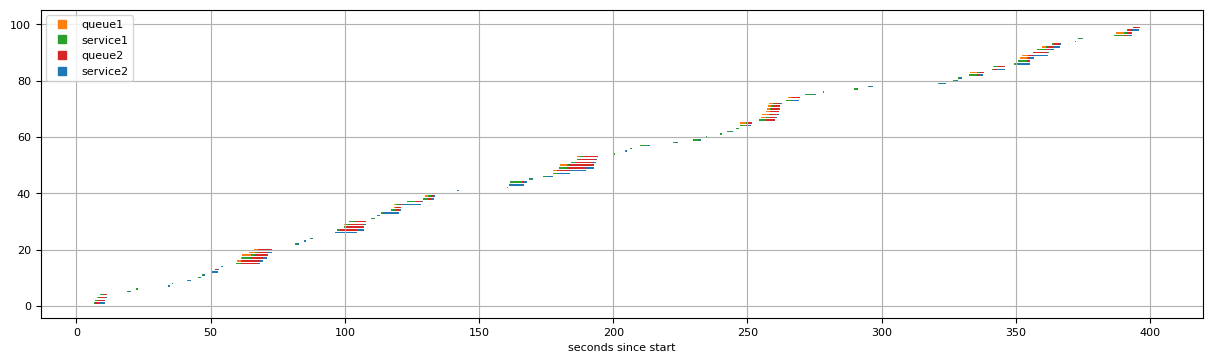

In [278]:
resumo("debug_aleatorio_05.csv")

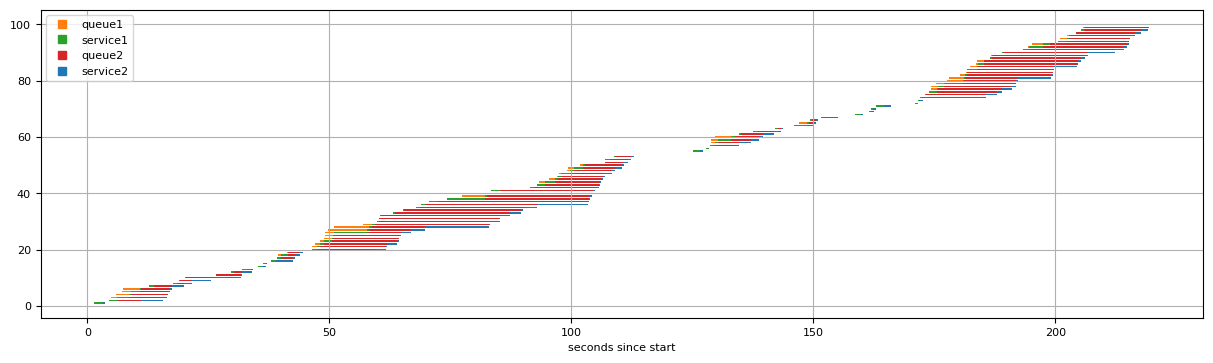

In [279]:
resumo("debug_aleatorio_09.csv")

## Simulador Deterministico

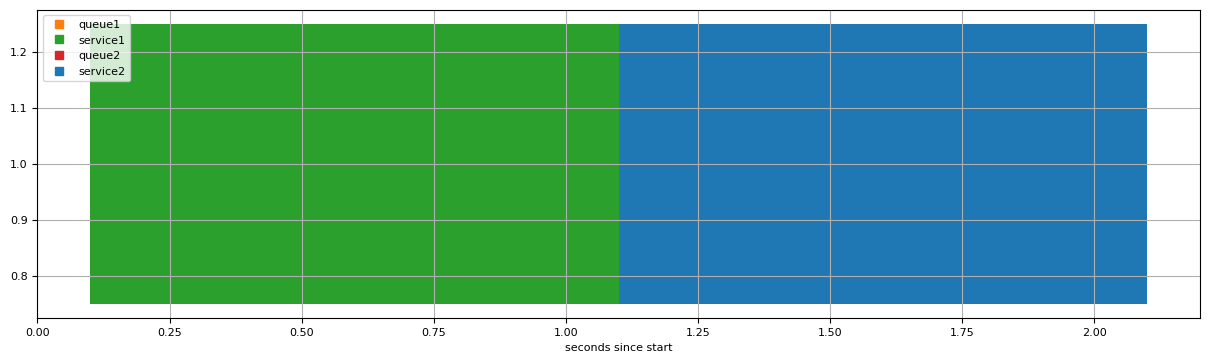

,tm_arrival,tm_service1,tm_service2,tm_arrival_queue1,tm_start_service1,tm_end_service1,tm_arrival_queue2,tm_start_service2,tm_end_service2
identifier,,,,,,,,,
1,0.1,1.0,1.0,0.1,0.1,1.1,1.1,1.1,2.1


In [426]:
# Teste de Fluxo
resumo("Validacoes Finais/teste_fluxo.csv", return_table = True, save_name = "teste_fluxo")

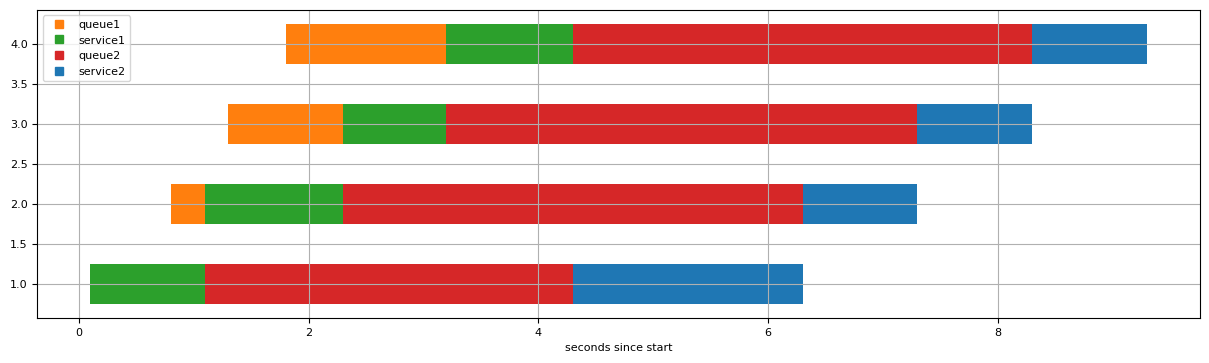

,tm_arrival,tm_service1,tm_service2,tm_arrival_queue1,tm_start_service1,tm_end_service1,tm_arrival_queue2,tm_start_service2,tm_end_service2
identifier,,,,,,,,,
1,0.1,1.0,2.0,0.1,0.1,1.1,1.1,4.3,6.3
2,0.8,1.2,1.0,0.8,1.1,2.3,2.3,6.3,7.3
3,1.3,0.9,1.0,1.3,2.3,3.2,3.2,7.3,8.3
4,1.8,1.1,1.0,1.8,3.2,4.3,4.3,8.3,9.3


In [427]:
# Teste de Prioridade
resumo("Validacoes Finais/teste_prioridade.csv", return_table = True, save_name = 'teste_prioridade')

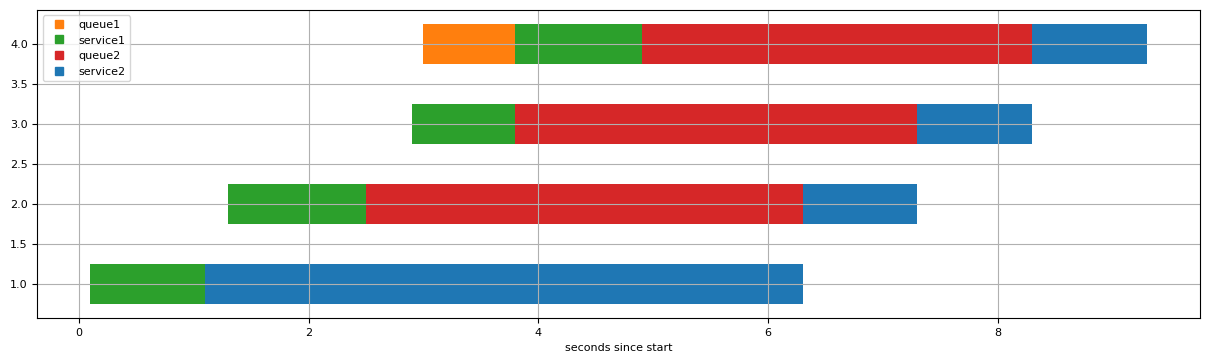

,tm_arrival,tm_service1,tm_service2,tm_arrival_queue1,tm_start_service1,tm_end_service1,tm_arrival_queue2,tm_start_service2,tm_end_service2
identifier,,,,,,,,,
1,0.1,1.0,2.0,0.1,0.1,1.1,1.1,1.1,6.3
2,1.3,1.2,1.0,1.3,1.3,2.5,2.5,6.3,7.3
3,2.9,0.9,1.0,2.9,2.9,3.8,3.8,7.3,8.3
4,3.0,1.1,1.0,3.0,3.8,4.9,4.9,8.3,9.3


In [429]:
# Teste de Interrupção
resumo("Validacoes Finais/teste_interrupcao.csv", return_table = True, save_name = 'teste_interrupcao')

In [ ]:
# teste longo
resumo("../Simulacoes/teste_longo.csv", return_table = True, save_name = 'teste_longo')

# Validação Handler Estatística

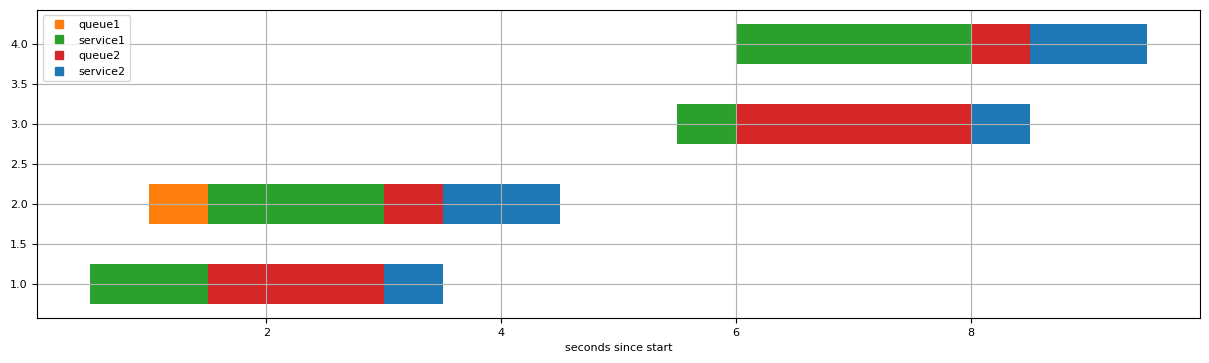

,tm_arrival,tm_service1,tm_service2,tm_arrival_queue1,tm_start_service1,tm_end_service1,tm_arrival_queue2,tm_start_service2,tm_end_service2
identifier,,,,,,,,,
1,0.5,1.0,0.5,0.5,0.5,1.5,1.5,3.0,3.5
2,1.0,1.5,1.0,1.0,1.5,3.0,3.0,3.5,4.5
3,5.5,0.5,0.5,5.5,5.5,6.0,6.0,8.0,8.5
4,6.0,2.0,1.0,6.0,6.0,8.0,8.0,8.5,9.5


In [424]:
resumo("Validacoes Finais/teste_two_round.csv", return_table = True, save_name = "teste_two_round")

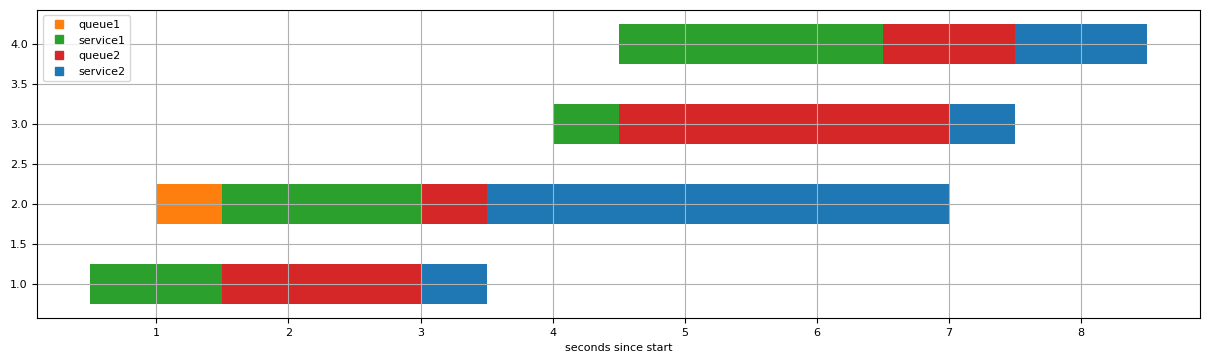

,tm_arrival,tm_service1,tm_service2,tm_arrival_queue1,tm_start_service1,tm_end_service1,tm_arrival_queue2,tm_start_service2,tm_end_service2
identifier,,,,,,,,,
1,0.5,1.0,0.5,0.5,0.5,1.5,1.5,3.0,3.5
2,1.0,1.5,1.0,1.0,1.5,3.0,3.0,3.5,7.0
3,4.0,0.5,0.5,4.0,4.0,4.5,4.5,7.0,7.5
4,4.5,2.0,1.0,4.5,4.5,6.5,6.5,7.5,8.5


In [425]:
resumo("Validacoes Finais/teste_two_round_overlay.csv", return_table = True, save_name = "teste_two_round_overlay")

# Estatísticas

In [262]:
def get_statistics(row):
    start_queue1 = row["tm_arrival_queue1"]
    tm_queue1 = row["tm_start_service1"] - start_queue1
    
    start_service1 = row["tm_start_service1"]
    tm_service1 = row["tm_end_service1"] - start_service1
    
    start_queue2 = row["tm_arrival_queue2"]
    tm_queue2 = row["tm_end_service2"] - row["tm_service2"] - start_queue2
    
    tm_service2 = row["tm_service2"]
    
    return pd.Series({"tm_queue1": tm_queue1, "tm_service1": tm_service1, "tm_queue2": tm_queue2, "tm_service2": tm_service2})

In [263]:
events = pd.read_csv("teste_longo.csv", index_col=0)

In [264]:
statistics = events.apply(get_statistics, axis=1)

In [265]:
chunk_size = 1000
lim_superior = [chunk.mean() + 2 * chunk.std() for chunk in np.array_split(statistics["tm_queue1"], len(statistics)/chunk_size)]
lim_superior = pd.Series(lim_superior, index=range(0, len(lim_superior) * chunk_size, chunk_size))

<AxesSubplot: xlabel='identifier'>

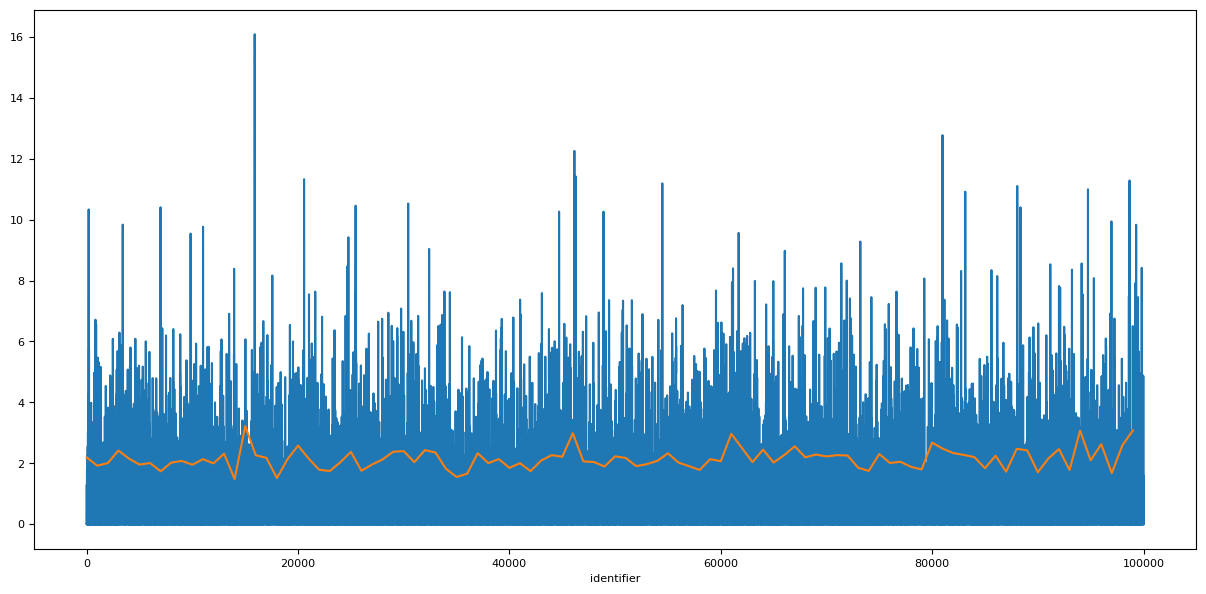

In [266]:
statistics["tm_queue1"].plot(figsize=(15,7))
lim_superior.plot(figsize=(15,7))

<AxesSubplot: xlabel='identifier'>

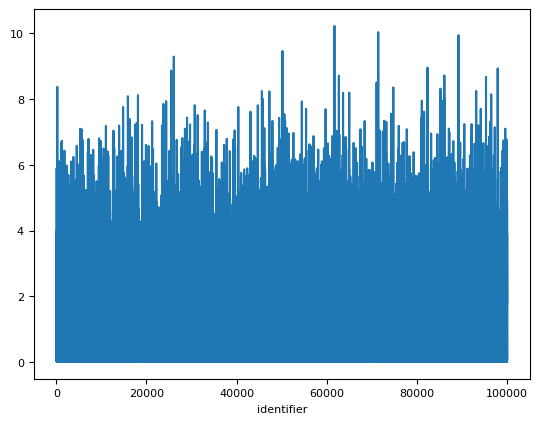

In [267]:
statistics["tm_service1"].plot()

<AxesSubplot: xlabel='identifier'>

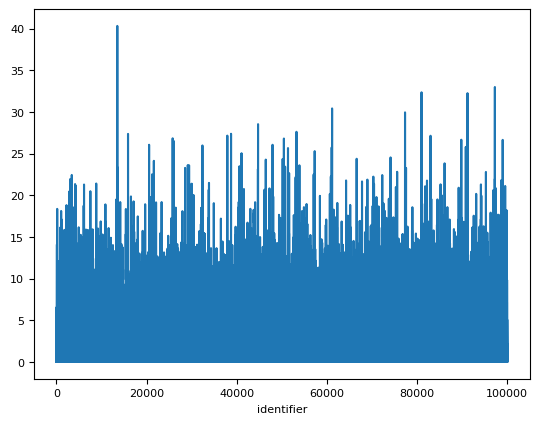

In [268]:
statistics["tm_queue2"].plot()

<AxesSubplot: xlabel='identifier'>

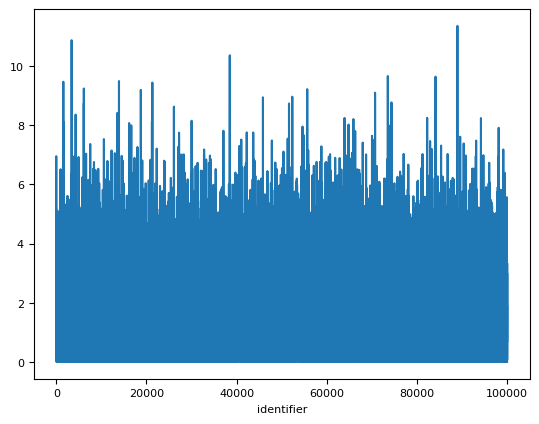

In [269]:
statistics["tm_service2"].plot()

In [402]:
df = pd.read_csv("Fase Transiente/teste_09.csv")

In [403]:
def ic(df):
    return 2 * 1.96 * df.std() / (np.sqrt(len(df)) * df.mean())

<AxesSubplot: >

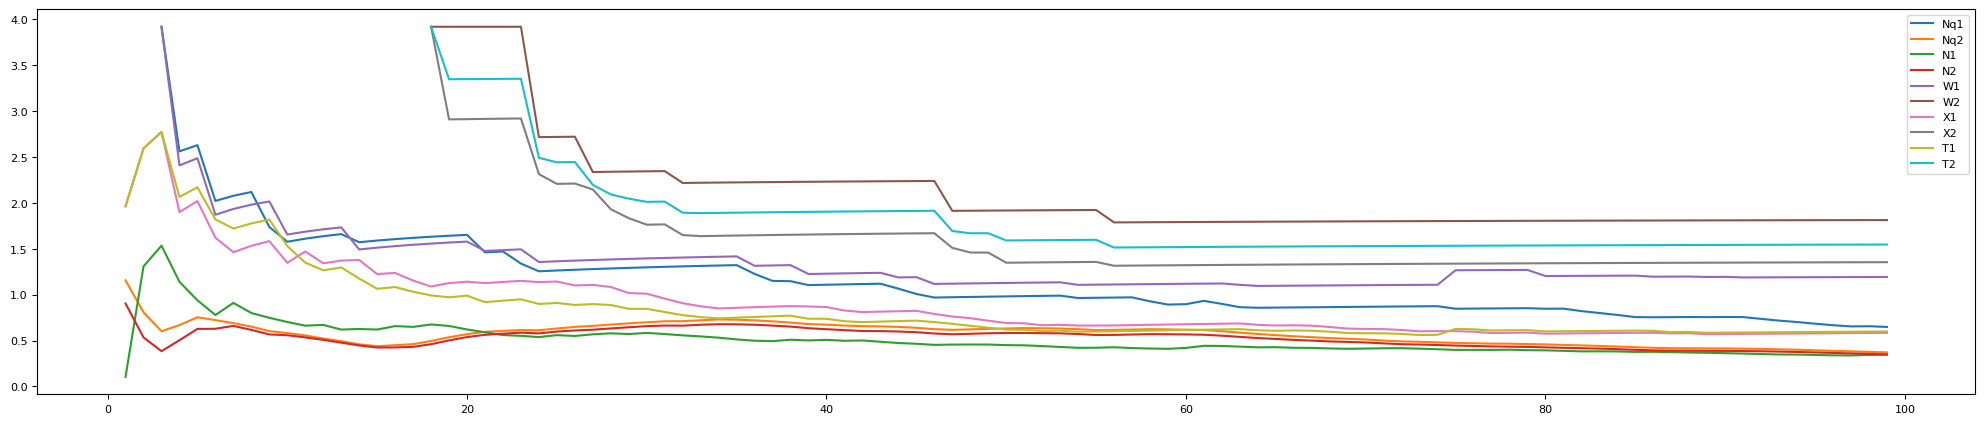

In [404]:
# acho que pode desconsiderar os 100 primeiros
df.iloc[:100, 1:].expanding().apply(ic).plot(figsize=(25,5))

<AxesSubplot: >

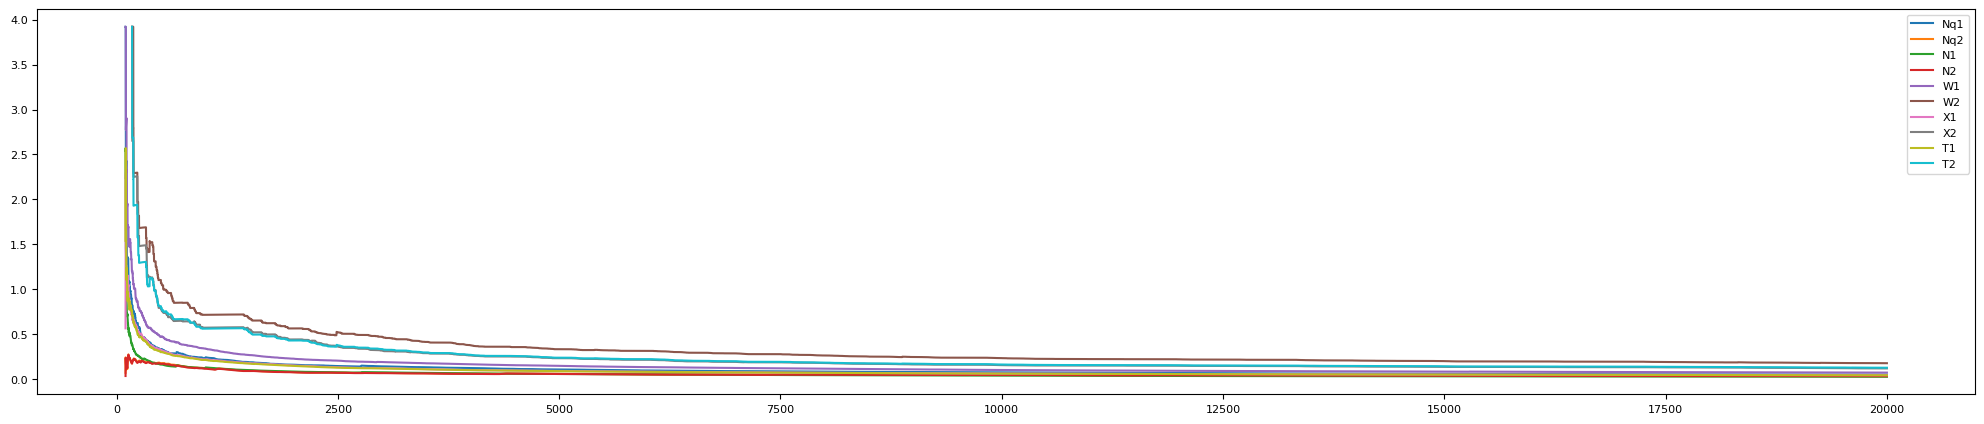

In [401]:
df.iloc[100:20000, 1:].expanding().apply(ic).iloc[2000:].plot(figsize=(25,5))

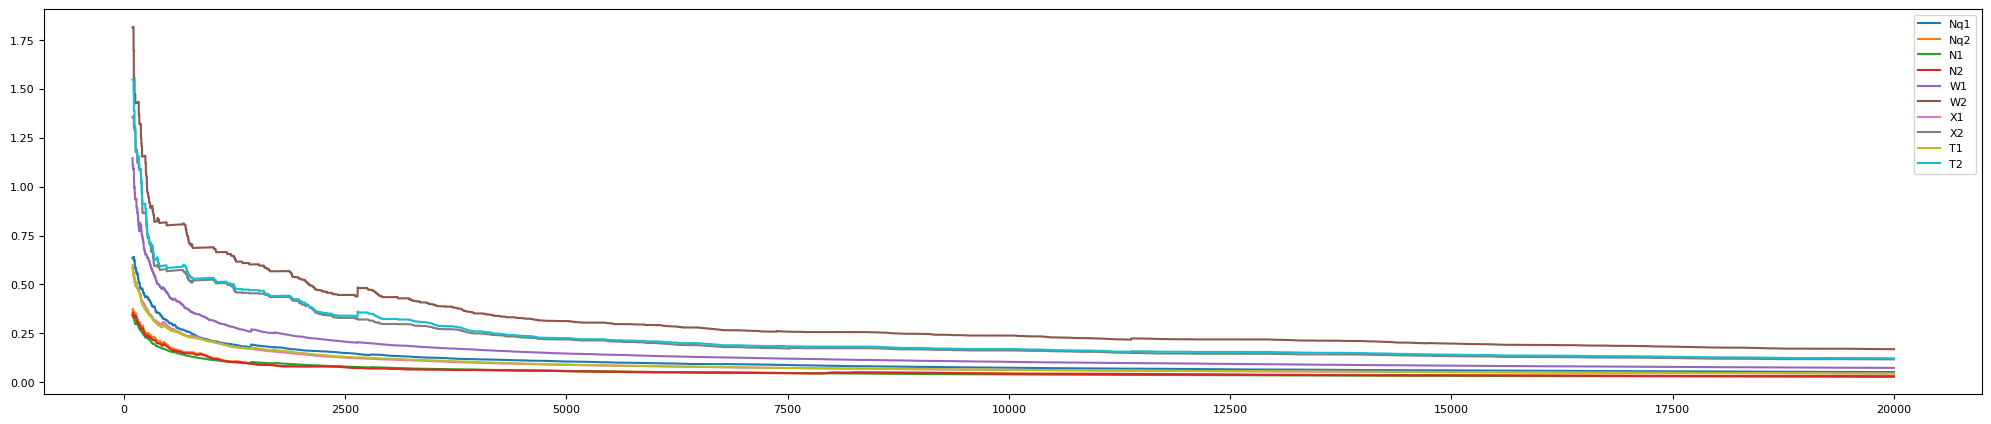

In [409]:
# esse foi o melhor resultado ate agora

df.iloc[:20000, 1:].expanding().apply(ic).iloc[100:].plot(figsize=(25,5))

plt.savefig("Figuras/transiente_expading_09.png")

plt.show()

<AxesSubplot: >

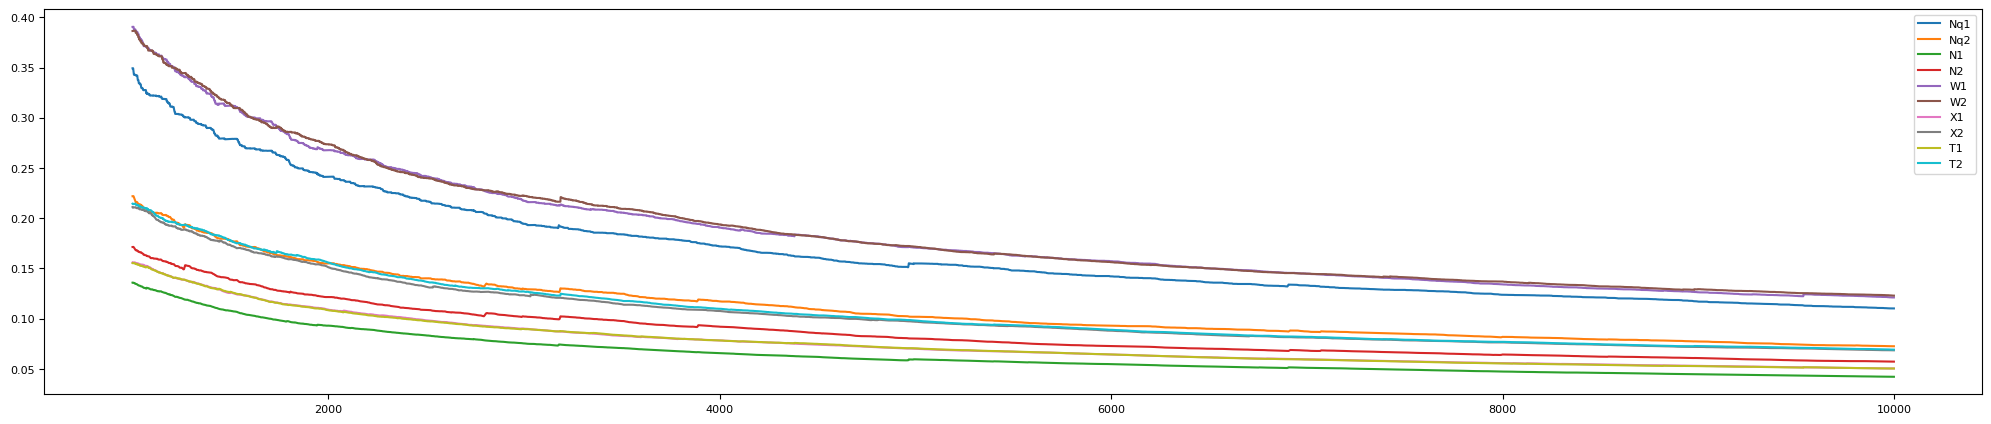

In [373]:
df.iloc[:, 1:].expanding().apply(ic).iloc[1000:].plot(figsize=(25,5))

In [410]:
df01 = pd.read_csv("Fase Transiente/teste_01.csv")

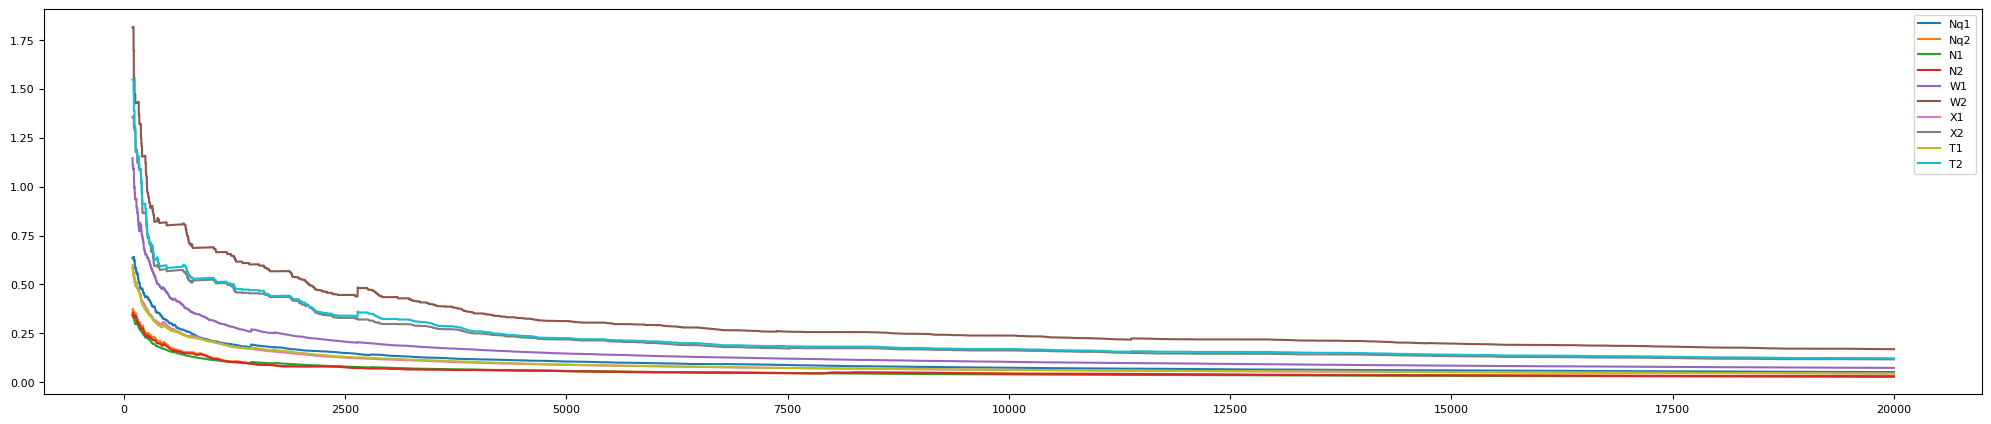

In [411]:
df.iloc[:20000, 1:].expanding().apply(ic).iloc[100:].plot(figsize=(25,5))

plt.savefig("Figuras/transiente_expading_01.png")

plt.show()